**KELOMPOK 7**

Rafi Aziizi Muchtar

Sandy Dwi Cahyo

Yosua Chrisarga Manuntun Marpaung

# LINEAR REGRESSION IMPLEMENTATION

In [ ]:
# melakukan import beberapa library penting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression

LOAD UP THE DATA + PLOTTING DATA

In [ ]:
#membaca isi dataset dan melihat pola kolom dataset dengan 5 data teratas.
data = pd.read_csv('bankloanscustom.csv')
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,23,1,3,4,13,3.1,0.045539,0.357461,NaN
1,23,1,3,4,13,3.1,0.045539,0.357461,NaN
2,23,1,3,4,13,3.1,0.045539,0.357461,NaN
3,26,1,0,0,14,7.5,0.302400,0.747600,1.0
4,29,1,2,0,14,14.4,0.586656,1.429344,1.0


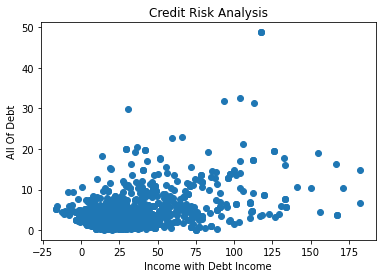

In [ ]:
#melakukan plotting data pada sebuah histogram dengan variable x merupakan income bersih(income-debtinc) dan y merupakan totaldebt(creditdebt+otherdebt)
import matplotlib.pyplot as plt
income=data['income']-data['debtinc']
debt=data['creddebt']+data['othdebt']
plt.scatter(income, debt)
plt.title('Credit Risk Analysis')
plt.xlabel('Income with Debt Income')
plt.ylabel('All Of Debt')
plt.show()
#data disimpulkan bahwa terjadi penumpukan orang yang memiliki income bersih pada rentang 0 hingga 75 dan memiliki utang dikisaran 0 hingga 15 setiap gajian pada 1 bulannya.

PREDICTION CREDIT RISK USING SKLEARN

In [ ]:
#melakukan inisialisasi variable X dan Y berdasarkan dataset
#X merupakan data bersih penghasilan (income-debtincome)
#Y merupakan total keseluruhan hutang (data creditdebt+otherdebt)
X = data.income[:,np.newaxis]-data.debtinc[:,np.newaxis]  # Reshape
y = data.creddebt+data.othdebt

In [ ]:
#inisialisasi fungsi LinearRegression pada variable regressor
#melakukan training dari variable X dan Y
regressor = LinearRegression()
regressor.fit(X, y)

In [ ]:
#melakukan prediksi terhadap data X yang dimasukan kedalam nilai y_pred
y_pred = regressor.predict(X)

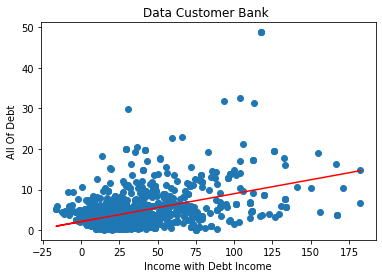

In [ ]:
#Melakukan visualisasi data dan mendapatkan prediksi linear regression berdasarkan data X dan hasil prediksi.
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Credit Risk Analysis')
plt.xlabel('Income with Debt Income')
plt.ylabel('All Of Debt')
plt.show()

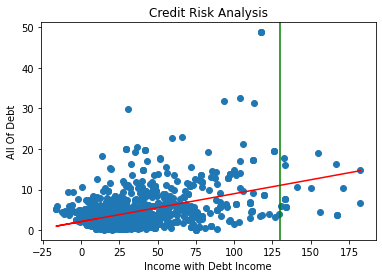

In [ ]:
 # Melakukan prediksi bahwa apabila memiliki income 130 maka akan nilai optimum untuk memiliki hutang dalam credit risk yaitu 10-12
plt.scatter(X, y)
plt.plot(X, y_pred, "r-")
plt.title('Credit Risk Analysis')
plt.xlabel('Income with Debt Income')
plt.ylabel('All Of Debt')
plt.axvline(x=130,c='g');

MULTIVARIATE LINEAR REGRESSION

In [ ]:
#membaca isi dataset dan melihat pola kolom dataset dengan 5 data teratas.
bank = pd.read_csv("bankloans.csv")
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
# Inisialisasi variable X sebagai seluruh data pada kolom
# Inisialisasi variable Y sebagai data hutang yaitu kolom creddebt dan otherdebt
X = bank.iloc[:,:-1]
y = bank.creddebt+bank.othdebt

In [ ]:
#Melakukan import library LinearRegression, memanggil fungsi LinearRegression pada variable Regressor
#Melakukan training data menggunakan LinearRegression berdasarkan data X dan y
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X, y)

LinearRegression()

In [ ]:
#Menghitung nilai intercepet dan koefisien dari proses training tersebut
print("intercept:", regressor.intercept_)
print("coefficients of predictors:", regressor.coef_)

intercept: 5.329070518200751e-15
coefficients of predictors: [-2.40716123e-16 -1.95676808e-15 -1.38777878e-16  1.00613962e-16
  5.55111512e-17  4.04156689e-16  1.00000000e+00  1.00000000e+00]


In [ ]:
#Memannggil seluruh isi dari data ke 18 pada variable X
risk = X.iloc[18]
risk

age         39.000000
ed           1.000000
employ       6.000000
address      9.000000
income      61.000000
debtinc      5.700000
creddebt     0.563274
othdebt      2.913726
Name: 18, dtype: float64

In [ ]:
#melakukan prediksi nilai hutang optimum pada data 
pred_my_risk = regressor.predict(risk.values.reshape(1, -1))
print("predicted value:", pred_my_risk[0])

predicted value: 3.4770000000000003


In [ ]:
#Memanggil nilai asli perhitungan hutang (creddebt+othdebt) dari data ke 18
print("actual value:", y[18])

actual value: 3.4770000000000003


In [ ]:
# Melakukan prediksi terhadap data X menggunakan Linear Regression
y_pred = regressor.predict(X)
y_pred[:10]

array([16.368,  5.363,  3.025,  3.48 ,  4.844,  2.55 , 20.502,  1.368,
        4.636,  4.925])

In [ ]:
#Membandingkan nilai hasil prediksi dengan nilai asli pada total data hutang yaitu (creddebt+othdebt) menggunakan dataframe
checkdebt = pd.DataFrame({"actual": y,
          "predicted": y_pred})
print(checkdebt)

      actual  predicted
0     16.368     16.368
1      5.363      5.363
2      3.025      3.025
3      3.480      3.480
4      4.844      4.844
...      ...        ...
1145   0.864      0.864
1146   6.612      6.612
1147   4.104      4.104
1148   1.872      1.872
1149   5.289      5.289

[1150 rows x 2 columns]
